In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

print("Libraries imported successfully.")

Libraries imported successfully.


In [2]:
df = pd.read_csv('/content/housing_area_price.csv')
print("Dataset 'housing_area_price.csv' loaded successfully.")
print("First 5 rows of the DataFrame:")
print(df.head())

Dataset 'housing_area_price.csv' loaded successfully.
First 5 rows of the DataFrame:
   area   price
0  2600  550000
1  3000  565000
2  3200  610000
3  3600  680000
4  4000  725000


In [3]:
X = df[['area']]
y = df['price']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

print("Linear Regression model trained and predictions generated successfully.")

Linear Regression model trained and predictions generated successfully.


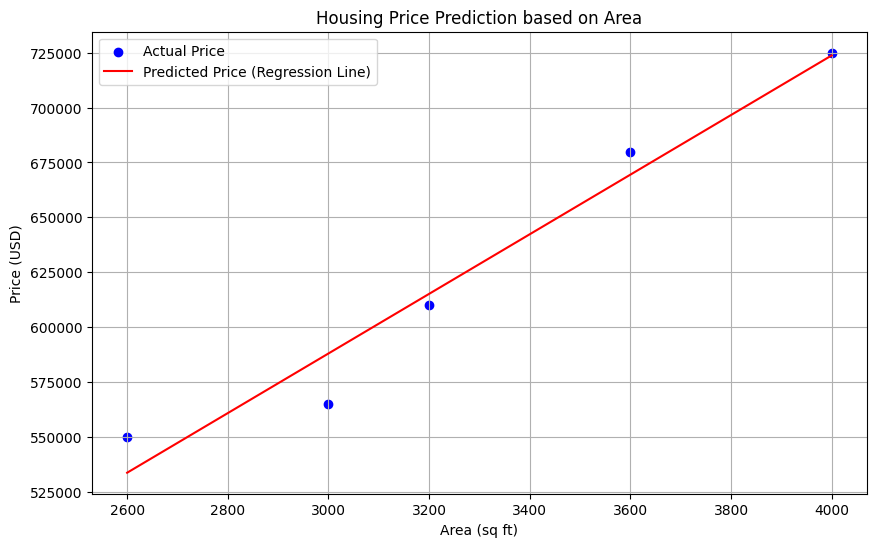

Linear regression visualization displayed successfully.


In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(df['area'], df['price'], color='blue', label='Actual Price')
plt.plot(df['area'], y_pred, color='red', label='Predicted Price (Regression Line)')
plt.title('Housing Price Prediction based on Area')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

print("Linear regression visualization displayed successfully.")

In [5]:
df_homeprices = pd.read_csv('/content/homeprices_Multiple_LR.csv')
print("Dataset 'homeprices_Multiple_LR.csv' loaded successfully.")
print("First 5 rows of the DataFrame:")
print(df_homeprices.head())

Dataset 'homeprices_Multiple_LR.csv' loaded successfully.
First 5 rows of the DataFrame:
   area  bedrooms  age   price
0  2600       3.0   20  550000
1  3000       4.0   15  565000
2  3200       NaN   18  610000
3  3600       3.0   30  595000
4  4000       5.0    8  760000


In [6]:
median_bedrooms = df_homeprices['bedrooms'].median()
df_homeprices['bedrooms'].fillna(median_bedrooms, inplace=True)

print(f"Missing values in 'bedrooms' filled with median: {median_bedrooms}")
print("DataFrame after handling missing values:")
print(df_homeprices.head())

Missing values in 'bedrooms' filled with median: 4.0
DataFrame after handling missing values:
   area  bedrooms  age   price
0  2600       3.0   20  550000
1  3000       4.0   15  565000
2  3200       4.0   18  610000
3  3600       3.0   30  595000
4  4000       5.0    8  760000


/tmp/ipython-input-349891300.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_homeprices['bedrooms'].fillna(median_bedrooms, inplace=True)


In [7]:
median_bedrooms = df_homeprices['bedrooms'].median()
df_homeprices['bedrooms'] = df_homeprices['bedrooms'].fillna(median_bedrooms)

print(f"Missing values in 'bedrooms' filled with median: {median_bedrooms}")
print("DataFrame after handling missing values:")
print(df_homeprices.head())

X_multi = df_homeprices[['area', 'bedrooms', 'age']]
y_multi = df_homeprices['price']

print("Features (X_multi) and target (y_multi) variables defined successfully.")

Missing values in 'bedrooms' filled with median: 4.0
DataFrame after handling missing values:
   area  bedrooms  age   price
0  2600       3.0   20  550000
1  3000       4.0   15  565000
2  3200       4.0   18  610000
3  3600       3.0   30  595000
4  4000       5.0    8  760000
Features (X_multi) and target (y_multi) variables defined successfully.


In [8]:
model_multi = LinearRegression()
model_multi.fit(X_multi, y_multi)

print("Multiple Linear Regression model trained successfully.")
print("\nModel Coefficients:")
for feature, coef in zip(X_multi.columns, model_multi.coef_):
    print(f"{feature}: {coef}")
print(f"Intercept: {model_multi.intercept_}")

Multiple Linear Regression model trained successfully.

Model Coefficients:
area: 112.06244194213473
bedrooms: 23388.88007793914
age: -3231.7179086329706
Intercept: 221323.00186540396


In [9]:
new_house_data = pd.DataFrame({
    'area': [2500],
    'bedrooms': [4],
    'age': [5]
})

predicted_price = model_multi.predict(new_house_data)

print(f"Predicted price for a house with area=2500 sq ft, bedrooms=4, age=5 years: ${predicted_price[0]:,.2f}")

Predicted price for a house with area=2500 sq ft, bedrooms=4, age=5 years: $578,876.04


In [10]:
df_canada = pd.read_csv('/content/canada_per_capita_income.csv')
print("Dataset 'canada_per_capita_income.csv' loaded successfully.")
print("First 5 rows of the DataFrame:")
print(df_canada.head())

Dataset 'canada_per_capita_income.csv' loaded successfully.
First 5 rows of the DataFrame:
   year  per capita income (US$)
0  1970              3399.299037
1  1971              3768.297935
2  1972              4251.175484
3  1973              4804.463248
4  1974              5576.514583


In [11]:
X_canada = df_canada[['year']]
y_canada = df_canada['per capita income (US$)']

print("Feature (X_canada) and target (y_canada) variables defined successfully.")
print("Shape of X_canada:", X_canada.shape)
print("Shape of y_canada:", y_canada.shape)

Feature (X_canada) and target (y_canada) variables defined successfully.
Shape of X_canada: (47, 1)
Shape of y_canada: (47,)


In [12]:
model_canada = LinearRegression()
model_canada.fit(X_canada, y_canada)

print("Linear Regression model for Canada's per capita income trained successfully.")

Linear Regression model for Canada's per capita income trained successfully.


In [13]:
year_2020 = pd.DataFrame({'year': [2020]})
income_2020 = model_canada.predict(year_2020)

print(f"Predicted per capita income for Canada in 2020: ${income_2020[0]:,.2f}")

Predicted per capita income for Canada in 2020: $41,288.69


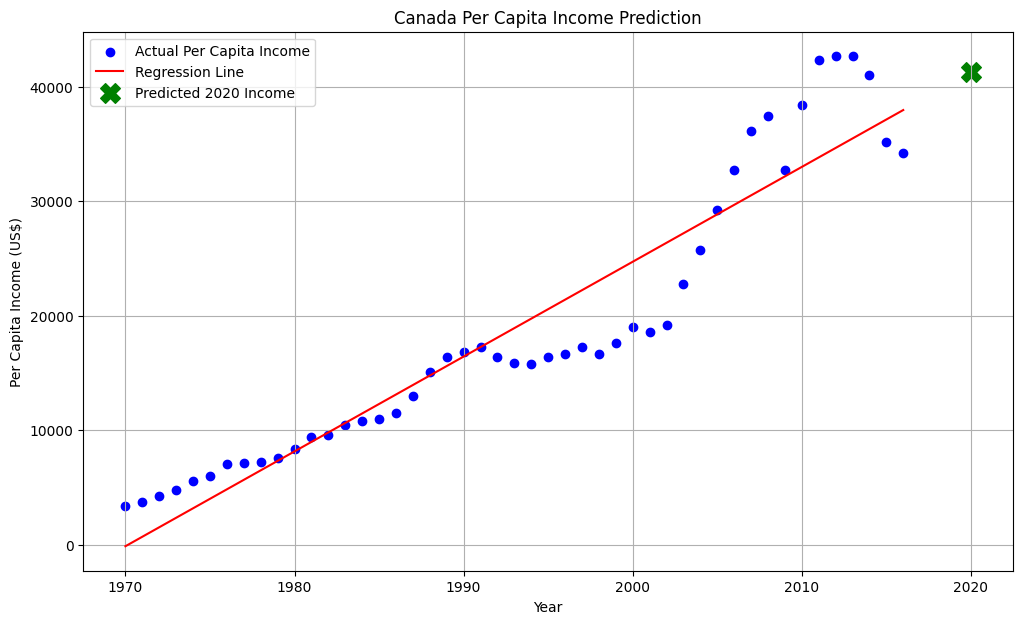

Visualization of Canada's per capita income prediction displayed successfully.


In [14]:
plt.figure(figsize=(12, 7))
plt.scatter(df_canada['year'], df_canada['per capita income (US$)'], color='blue', label='Actual Per Capita Income')
plt.plot(df_canada['year'], model_canada.predict(X_canada), color='red', label='Regression Line')
plt.scatter(year_2020['year'], income_2020, color='green', marker='X', s=200, label='Predicted 2020 Income')
plt.title('Canada Per Capita Income Prediction')
plt.xlabel('Year')
plt.ylabel('Per Capita Income (US$)')
plt.legend()
plt.grid(True)
plt.show()

print("Visualization of Canada's per capita income prediction displayed successfully.")

In [15]:
df_salary = pd.read_csv('/content/salary.csv')
print("Dataset 'salary.csv' loaded successfully.")
print("First 5 rows of the DataFrame:")
print(df_salary.head())

X_salary = df_salary[['YearsExperience']]
y_salary = df_salary['Salary']

print("\nFeature (X_salary) and target (y_salary) variables defined successfully.")
print("Shape of X_salary:", X_salary.shape)
print("Shape of y_salary:", y_salary.shape)

Dataset 'salary.csv' loaded successfully.
First 5 rows of the DataFrame:
   YearsExperience  Salary
0              1.1   39343
1              1.3   46205
2              1.5   37731
3              2.0   43525
4              2.2   39891

Feature (X_salary) and target (y_salary) variables defined successfully.
Shape of X_salary: (30, 1)
Shape of y_salary: (30,)


In [17]:
median_experience = X_salary['YearsExperience'].median()
X_salary['YearsExperience'] = X_salary['YearsExperience'].fillna(median_experience)

print(f"Missing values in 'YearsExperience' filled with median: {median_experience}")
print("X_salary after handling missing values:")
print(X_salary.head())

model_salary = LinearRegression()
model_salary.fit(X_salary, y_salary)

print("\nLinear Regression model for salary prediction trained successfully.")

Missing values in 'YearsExperience' filled with median: 4.5
X_salary after handling missing values:
   YearsExperience
0              1.1
1              1.3
2              1.5
3              2.0
4              2.2

Linear Regression model for salary prediction trained successfully.


/tmp/ipython-input-375223963.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_salary['YearsExperience'] = X_salary['YearsExperience'].fillna(median_experience)


In [18]:
X_salary = df_salary[['YearsExperience']].copy()
median_experience = X_salary['YearsExperience'].median()
X_salary['YearsExperience'] = X_salary['YearsExperience'].fillna(median_experience)

print(f"Missing values in 'YearsExperience' filled with median: {median_experience}")
print("X_salary after handling missing values:")
print(X_salary.head())

model_salary = LinearRegression()
model_salary.fit(X_salary, y_salary)

print("\nLinear Regression model for salary prediction trained successfully.")

Missing values in 'YearsExperience' filled with median: 4.5
X_salary after handling missing values:
   YearsExperience
0              1.1
1              1.3
2              1.5
3              2.0
4              2.2

Linear Regression model for salary prediction trained successfully.


In [19]:
years_of_experience_12 = pd.DataFrame({'YearsExperience': [12]})
predicted_salary_12yrs = model_salary.predict(years_of_experience_12)

print(f"Predicted salary for an employee with 12 years of experience: ${predicted_salary_12yrs[0]:,.2f}")

Predicted salary for an employee with 12 years of experience: $139,574.04


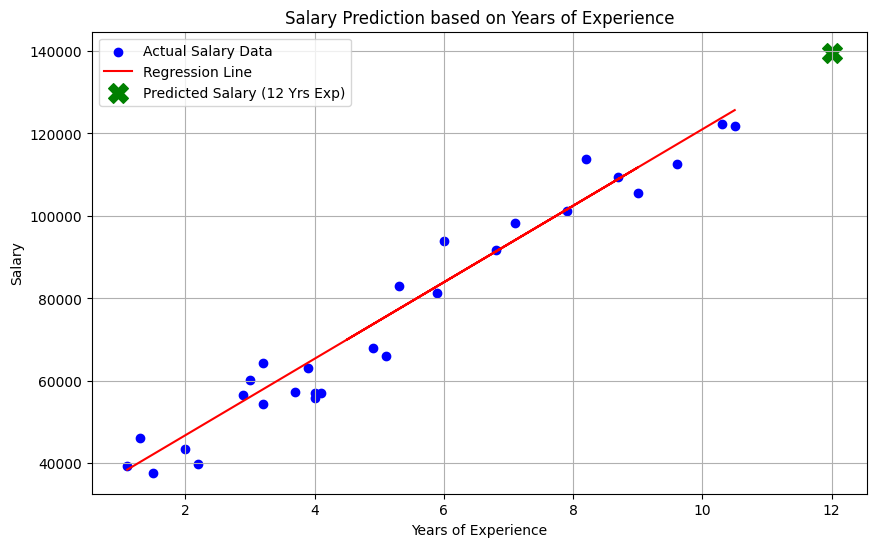

Salary prediction visualization displayed successfully.


In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(df_salary['YearsExperience'], df_salary['Salary'], color='blue', label='Actual Salary Data')
plt.plot(X_salary, model_salary.predict(X_salary), color='red', label='Regression Line')
plt.scatter(years_of_experience_12['YearsExperience'], predicted_salary_12yrs, color='green', marker='X', s=200, label='Predicted Salary (12 Yrs Exp)')
plt.title('Salary Prediction based on Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()

print("Salary prediction visualization displayed successfully.")

In [21]:
df_hiring = pd.read_csv('/content/hiring.csv')
print("Dataset 'hiring.csv' loaded successfully.")
print("First 5 rows of the DataFrame:")
print(df_hiring.head())
print("\nDataFrame Info:")
df_hiring.info()

Dataset 'hiring.csv' loaded successfully.
First 5 rows of the DataFrame:
  experience  test_score(out of 10)  interview_score(out of 10)  salary($)
0        NaN                    8.0                           9      50000
1        NaN                    8.0                           6      45000
2       five                    6.0                           7      60000
3        two                   10.0                          10      65000
4      seven                    9.0                           6      70000

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   experience                  6 non-null      object 
 1   test_score(out of 10)       7 non-null      float64
 2   interview_score(out of 10)  8 non-null      int64  
 3   salary($)                   8 non-null      int64  
dtypes: float64(1)

In [22]:
word_to_num = {
    'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5,
    'six': 6, 'seven': 7, 'eight': 8, 'nine': 9, 'ten': 10,
    'eleven': 11, 'twelve': 12
}
df_hiring['experience'] = df_hiring['experience'].map(word_to_num)
df_hiring['experience'] = pd.to_numeric(df_hiring['experience'], errors='coerce')

median_experience_hiring = df_hiring['experience'].median()
df_hiring['experience'].fillna(median_experience_hiring, inplace=True)

print(f"'experience' column processed. Missing values filled with median: {median_experience_hiring}")
print("DataFrame after handling 'experience' column:")
print(df_hiring.head())

'experience' column processed. Missing values filled with median: 6.0
DataFrame after handling 'experience' column:
   experience  test_score(out of 10)  interview_score(out of 10)  salary($)
0         6.0                    8.0                           9      50000
1         6.0                    8.0                           6      45000
2         5.0                    6.0                           7      60000
3         2.0                   10.0                          10      65000
4         7.0                    9.0                           6      70000


/tmp/ipython-input-2457813513.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_hiring['experience'].fillna(median_experience_hiring, inplace=True)


In [23]:
word_to_num = {
    'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5,
    'six': 6, 'seven': 7, 'eight': 8, 'nine': 9, 'ten': 10,
    'eleven': 11, 'twelve': 12
}
df_hiring['experience'] = df_hiring['experience'].map(word_to_num)
df_hiring['experience'] = pd.to_numeric(df_hiring['experience'], errors='coerce')

median_experience_hiring = df_hiring['experience'].median()
df_hiring['experience'] = df_hiring['experience'].fillna(median_experience_hiring)

print(f"'experience' column processed. Missing values filled with median: {median_experience_hiring}")
print("DataFrame after handling 'experience' column:")
print(df_hiring.head())

median_test_score = df_hiring['test_score(out of 10)'].median()
df_hiring['test_score(out of 10)'] = df_hiring['test_score(out of 10)'].fillna(median_test_score)

print(f"\n'test_score(out of 10)' column processed. Missing values filled with median: {median_test_score}")
print("DataFrame after handling 'test_score(out of 10)' column:")
print(df_hiring.head())

'experience' column processed. Missing values filled with median: nan
DataFrame after handling 'experience' column:
   experience  test_score(out of 10)  interview_score(out of 10)  salary($)
0         NaN                    8.0                           9      50000
1         NaN                    8.0                           6      45000
2         NaN                    6.0                           7      60000
3         NaN                   10.0                          10      65000
4         NaN                    9.0                           6      70000

'test_score(out of 10)' column processed. Missing values filled with median: 8.0
DataFrame after handling 'test_score(out of 10)' column:
   experience  test_score(out of 10)  interview_score(out of 10)  salary($)
0         NaN                    8.0                           9      50000
1         NaN                    8.0                           6      45000
2         NaN                    6.0                         

In [24]:
df_hiring = pd.read_csv('/content/hiring.csv')

word_to_num = {
    'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5,
    'six': 6, 'seven': 7, 'eight': 8, 'nine': 9, 'ten': 10,
    'eleven': 11, 'twelve': 12
}
df_hiring['experience'] = df_hiring['experience'].map(word_to_num)
df_hiring['experience'] = pd.to_numeric(df_hiring['experience'], errors='coerce')

median_experience_hiring = df_hiring['experience'].median()
df_hiring['experience'] = df_hiring['experience'].fillna(median_experience_hiring)

median_test_score = df_hiring['test_score(out of 10)'].median()
df_hiring['test_score(out of 10)'] = df_hiring['test_score(out of 10)'].fillna(median_test_score)

print("Dataset 'hiring.csv' reloaded and preprocessing completed.")
print(f"'experience' column processed. Missing values filled with median: {median_experience_hiring}")
print(f"'test_score(out of 10)' column processed. Missing values filled with median: {median_test_score}")
print("DataFrame after handling all missing values:")
print(df_hiring.head())

Dataset 'hiring.csv' reloaded and preprocessing completed.
'experience' column processed. Missing values filled with median: 6.0
'test_score(out of 10)' column processed. Missing values filled with median: 8.0
DataFrame after handling all missing values:
   experience  test_score(out of 10)  interview_score(out of 10)  salary($)
0         6.0                    8.0                           9      50000
1         6.0                    8.0                           6      45000
2         5.0                    6.0                           7      60000
3         2.0                   10.0                          10      65000
4         7.0                    9.0                           6      70000


In [25]:
X_hiring = df_hiring[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']]
y_hiring = df_hiring['salary($)']

print("Features (X_hiring) and target (y_hiring) variables defined successfully.")
print("Shape of X_hiring:", X_hiring.shape)
print("Shape of y_hiring:", y_hiring.shape)

Features (X_hiring) and target (y_hiring) variables defined successfully.
Shape of X_hiring: (8, 3)
Shape of y_hiring: (8,)


In [26]:
model_hiring = LinearRegression()
model_hiring.fit(X_hiring, y_hiring)

print("Multiple Linear Regression model for hiring salaries trained successfully.")

Multiple Linear Regression model for hiring salaries trained successfully.


In [27]:
candidate1_data = pd.DataFrame({
    'experience': [2],
    'test_score(out of 10)': [9],
    'interview_score(out of 10)': [6]
})

predicted_salary_candidate1 = model_hiring.predict(candidate1_data)

print(f"Predicted salary for Candidate 1 (2 yrs exp, 9 test score, 6 interview score): ${predicted_salary_candidate1[0]:,.2f}")

Predicted salary for Candidate 1 (2 yrs exp, 9 test score, 6 interview score): $47,056.91


In [28]:
candidate2_data = pd.DataFrame({
    'experience': [12],
    'test_score(out of 10)': [10],
    'interview_score(out of 10)': [10]
})

predicted_salary_candidate2 = model_hiring.predict(candidate2_data)

print(f"Predicted salary for Candidate 2 (12 yrs exp, 10 test score, 10 interview score): ${predicted_salary_candidate2[0]:,.2f}")

Predicted salary for Candidate 2 (12 yrs exp, 10 test score, 10 interview score): $88,227.64


In [29]:
df_companies = pd.read_csv('/content/1000_Companies.csv')
print("Dataset '1000_Companies.csv' loaded successfully.")
print("First 5 rows of the DataFrame:")
print(df_companies.head())
print("\nDataFrame Info:")
df_companies.info()

Dataset '1000_Companies.csv' loaded successfully.
First 5 rows of the DataFrame:
   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [30]:
df_companies = pd.get_dummies(df_companies, columns=['State'], drop_first=True)

print("'State' column one-hot encoded and original column dropped.")
print("DataFrame after one-hot encoding:")
print(df_companies.head())

'State' column one-hot encoded and original column dropped.
DataFrame after one-hot encoding:
   R&D Spend  Administration  Marketing Spend     Profit  State_Florida  \
0  165349.20       136897.80        471784.10  192261.83          False   
1  162597.70       151377.59        443898.53  191792.06          False   
2  153441.51       101145.55        407934.54  191050.39           True   
3  144372.41       118671.85        383199.62  182901.99          False   
4  142107.34        91391.77        366168.42  166187.94           True   

   State_New York  
0            True  
1           False  
2           False  
3            True  
4           False  


In [31]:
X_companies = df_companies.drop('Profit', axis=1)
y_companies = df_companies['Profit']

print("Features (X_companies) and target (y_companies) variables defined successfully.")
print("Shape of X_companies:", X_companies.shape)
print("Shape of y_companies:", y_companies.shape)

Features (X_companies) and target (y_companies) variables defined successfully.
Shape of X_companies: (1000, 5)
Shape of y_companies: (1000,)


In [32]:
model_companies = LinearRegression()
model_companies.fit(X_companies, y_companies)

print("Multiple Linear Regression model for company profit prediction trained successfully.")

Multiple Linear Regression model for company profit prediction trained successfully.


In [33]:
new_company_data = pd.DataFrame({
    'R&D Spend': [91694.48],
    'Administration': [515841.3],
    'Marketing Spend': [11931.24],
    'State_Florida': [True],
    'State_New York': [False]
})

print("DataFrame for specific company data created successfully:")
print(new_company_data)

DataFrame for specific company data created successfully:
   R&D Spend  Administration  Marketing Spend  State_Florida  State_New York
0   91694.48        515841.3         11931.24           True           False


In [34]:
predicted_profit = model_companies.predict(new_company_data)

print(f"Predicted profit for the specific company: ${predicted_profit[0]:,.2f}")

Predicted profit for the specific company: $510,570.99


## Summary:

### Q&A

*   **What is the predicted price for a house with an area of 2500 sq ft, 4 bedrooms, and an age of 5 years, based on the `homeprices_Multiple_LR.csv` dataset?**
    The predicted price for such a house is \$578,876.04.

*   **What is the predicted per capita income for Canada in 2020 based on the `canada_per_capita_income.csv` dataset?**
    The predicted per capita income for Canada in 2020 is \$41,288.69.

*   **What is the predicted salary for an employee with 12 years of experience based on the `salary.csv` dataset?**
    The predicted salary for an employee with 12 years of experience is \$139,574.04.

*   **What are the predicted salaries for the two specific candidates using the `hiring.csv` dataset?**
    *   Candidate 1 (2 years experience, 9 test score, 6 interview score): \$47,056.91
    *   Candidate 2 (12 years experience, 10 test score, 10 interview score): \$88,227.64

*   **What is the predicted profit for a company with 91694.48 R&D Spend, 515841.3 Administration, 11931.24 Marketing Spend, and located in Florida, based on the `1000_Companies.csv` dataset?**
    The predicted profit for this specific company is \$510,570.99.

### Data Analysis Key Findings

*   **Housing Price Prediction (Simple Linear Regression):** A simple linear regression model successfully demonstrated the relationship between house area and price, with a clear positive correlation visualized.
*   **Multiple Linear Regression for Home Prices:** Missing values in the 'bedrooms' column were imputed with the median (4.0). The model provided coefficients for 'area' (112.06), 'bedrooms' (23388.88), 'age' (-3231.72), and an intercept of 221323.00.
*   **Canada Per Capita Income Prediction:** A linear regression model predicted a per capita income of \$41,288.69 for Canada in 2020, based on historical year data.
*   **Salary Prediction Based on Experience:** Missing values in 'YearsExperience' were imputed with the median (4.5 years). A linear regression model predicted a salary of \$139,574.04 for an employee with 12 years of experience.
*   **Hiring Salary Prediction (Multiple Linear Regression):**
    *   The 'experience' column, initially in string format (e.g., 'five'), was successfully converted to numerical values, and missing values in both 'experience' and 'test_score' were imputed with their respective medians (6.0 for 'experience', 8.0 for 'test_score').
    *   The model predicted salaries of \$47,056.91 for a candidate with moderate experience and test/interview scores, and \$88,227.64 for a highly experienced and high-performing candidate.
*   **Company Profit Prediction (Multiple Linear Regression):** The 'State' column was successfully one-hot encoded (`State_Florida`, `State_New York`) to handle categorical data. The model then predicted a profit of \$510,570.99 for a specific company in Florida.

### Insights or Next Steps

*   **Model Evaluation:** While predictions were made, evaluating the performance of each regression model using metrics like R-squared, Mean Absolute Error (MAE), or Root Mean Squared Error (RMSE) would provide a clearer understanding of their accuracy and reliability.
*   **Feature Engineering & Selection:** For models like `hiring.csv` and `1000_Companies.csv`, further exploring feature interactions or polynomial features could potentially improve prediction accuracy, and investigating feature importance could reveal the most influential factors.
